# Web Scraping & Data Analysis Project
## Scraping Quotes and Analyzing Author Data

**Project Overview:**
In this project, you will:
1. Scrape quotes and author information from a website https://quotes.toscrape.com/
2. Clean and organize the data
3. Perform exploratory data analysis
4. Create visualizations
5. Answer analytical questions

**Learning Objectives:**
- Web scraping with BeautifulSoup
- Data cleaning and manipulation with Pandas
- Data visualization with Matplotlib/Seaborn
- Basic statistical analysis

## Solution

In [1]:
# import the necessary modules or libraries
# if library is not available run the command below in your terminal or command prompt;
## pip install requests 
## pip install beautifulsoup4 
## pip install pandas 
## pip install matplotlib 
## pip install seaborn


import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
# Function to scrape quotes from a single page
def scrape_quotes_page(url):
    """
    Scrape quotes, authors, and tags from a given URL
    
    Parameters:
    url (str): URL to scrape
    
    Returns:
    list: List of dictionaries containing quote data
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    quotes_data = []
    
    # Find all quote containers
    quotes = soup.find_all('div', class_='quote')
    
    for quote in quotes:
        # Extract quote text
        text = quote.find('span', class_='text').text.strip()
        # Remove quotation marks
        text = text.strip('""')
        
        # Extract author
        author = quote.find('small', class_='author').text
        
        # Extract tags
        tags = [tag.text for tag in quote.find_all('a', class_='tag')]
        
        # Extract quote length and word count
        quote_length = len(text)
        word_count = len(text.split())
        
        quotes_data.append({
            'quote': text,
            'author': author,
            'tags': ', '.join(tags),
            'num_tags': len(tags),
            'quote_length': quote_length,
            'word_count': word_count
        })
    
    return quotes_data

## Q1a. create a DataFrame from the scraped data and display it. Also what is the shape of this data?

## Q1b. What is the shape of this data?

## Q2. Data Cleaning: Check for and handle any issues in the data

## Q3. Find the top 5 authors with the most quotes

## Q4. Create a scatter plot showing the relationship between word count and quote length

## Q5a. Analyze the most common tags. Extract all tags and count them

## Q5b. Visualize the data above

In [3]:
quote = scrape_quotes_page(url= "http://quotes.toscrape.com/page/1")

In [4]:
df = pd.DataFrame(quote)

In [5]:
df

,quote,author,tags,num_tags,quote_length,word_count
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world",4,115,21
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices",2,85,16
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles",5,131,26
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor",4,104,19
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational",2,111,16
5,“Try not to become a man of success. Rather be...,Albert Einstein,"adulthood, success, value",3,67,14
6,“It is better to be hated for what you are tha...,André Gide,"life, love",2,82,19
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,"edison, failure, inspirational, paraphrased",4,65,12
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt,1,85,19
9,"“A day without sunshine is like, you know, nig...",Steve Martin,"humor, obvious, simile",3,50,9


In [6]:
df.shape

(10, 6)

In [7]:
## Q2. Data Cleaning: Check for and handle any issues in the data
##cleaning of empty cells
new_df = df.dropna()
print(new_df.to_string())


                                                                                                                                 quote             author                                          tags  num_tags  quote_length  word_count
0                  “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”    Albert Einstein        change, deep-thoughts, thinking, world         4           115          21
1                                                “It is our choices, Harry, that show what we truly are, far more than our abilities.”       J.K. Rowling                            abilities, choices         2            85          16
2  “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”    Albert Einstein  inspirational, life, live, miracle, miracles         5           131          26
3                             “The person, be it gentlem

In [8]:
## replacing empty values with a number
print(df.fillna(0, inplace = True) )

None


In [9]:
## Q3. Find the top 5 authors with the most quotes
df['author'].value_counts().head(5)

author
Albert Einstein    3
J.K. Rowling       1
Jane Austen        1
Marilyn Monroe     1
André Gide         1
Name: count, dtype: int64

In [11]:
# Q4. Create a scatter plot showing the relationship between word count and quote length
word_count = df['word_count'].tolist()
print(word_count)

[21, 16, 26, 19, 16, 14, 19, 12, 19, 9]


In [12]:
quote_length = df['quote_length'].tolist()
print(quote_length)

[115, 85, 131, 104, 111, 67, 82, 65, 85, 50]


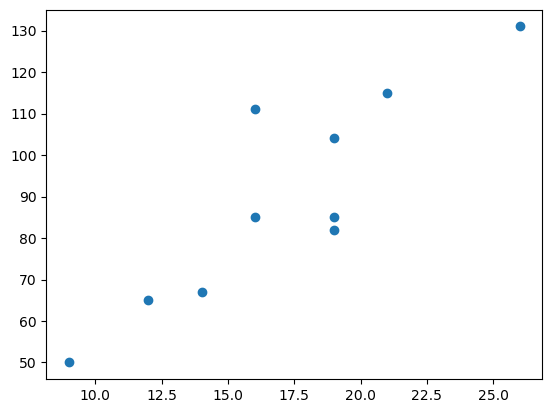

In [13]:
import numpy as np
x = np.array([21, 16, 26, 19, 16, 14, 19, 12, 19, 9])
y = np.array([115, 85, 131, 104, 111, 67, 82, 65, 85, 50])

plt.scatter(x,y)
plt.show()

In [18]:
## Q5a. Analyze the most common tags. Extract all tags and count them
# tags = df['tags'].tolist()
# print(tags)
df['tags']

0          change, deep-thoughts, thinking, world
1                              abilities, choices
2    inspirational, life, live, miracle, miracles
3                aliteracy, books, classic, humor
4                      be-yourself, inspirational
5                       adulthood, success, value
6                                      life, love
7     edison, failure, inspirational, paraphrased
8                 misattributed-eleanor-roosevelt
9                          humor, obvious, simile
Name: tags, dtype: object

In [58]:
print(df['tags'].value_counts())

tags
change, deep-thoughts, thinking, world          1
abilities, choices                              1
inspirational, life, live, miracle, miracles    1
aliteracy, books, classic, humor                1
be-yourself, inspirational                      1
adulthood, success, value                       1
life, love                                      1
edison, failure, inspirational, paraphrased     1
misattributed-eleanor-roosevelt                 1
humor, obvious, simile                          1
Name: count, dtype: int64


In [19]:
# count tags
tag_count = Counter(df['tags'])
print(tag_count)

Counter({'change, deep-thoughts, thinking, world': 1, 'abilities, choices': 1, 'inspirational, life, live, miracle, miracles': 1, 'aliteracy, books, classic, humor': 1, 'be-yourself, inspirational': 1, 'adulthood, success, value': 1, 'life, love': 1, 'edison, failure, inspirational, paraphrased': 1, 'misattributed-eleanor-roosevelt': 1, 'humor, obvious, simile': 1})


## AS we can tell from above, each row has a string of tags.
## What we have to do is to loop through each row, take a string of tags and split it into the individual tags. The individual tags can be added to a newly created list

In [ ]:
# all tags list
all_tags = []
for str_of_tags in df['tags']:
    # check if string is not empty
    if str_of_tags:
        # split string by comma and strip whitespace
        tags_split = [tag.strip() for tag in str_of_tags.split(',')]
        # add to all_tags list
        all_tags.extend(tags_split)

# print(all_tags)

['change', 'deep-thoughts', 'thinking', 'world', 'abilities', 'choices', 'inspirational', 'life', 'live', 'miracle', 'miracles', 'aliteracy', 'books', 'classic', 'humor', 'be-yourself', 'inspirational', 'adulthood', 'success', 'value', 'life', 'love', 'edison', 'failure', 'inspirational', 'paraphrased', 'misattributed-eleanor-roosevelt', 'humor', 'obvious', 'simile']


In [22]:
# we have all the tags separated into a list
all_tags

['change',
 'deep-thoughts',
 'thinking',
 'world',
 'abilities',
 'choices',
 'inspirational',
 'life',
 'live',
 'miracle',
 'miracles',
 'aliteracy',
 'books',
 'classic',
 'humor',
 'be-yourself',
 'inspirational',
 'adulthood',
 'success',
 'value',
 'life',
 'love',
 'edison',
 'failure',
 'inspirational',
 'paraphrased',
 'misattributed-eleanor-roosevelt',
 'humor',
 'obvious',
 'simile']

## Now we can analyze the tags

In [23]:
tags_count = Counter(all_tags)
# get the 10 most common tags
tags_count.most_common(10)


[('inspirational', 3),
 ('life', 2),
 ('humor', 2),
 ('change', 1),
 ('deep-thoughts', 1),
 ('thinking', 1),
 ('world', 1),
 ('abilities', 1),
 ('choices', 1),
 ('live', 1)]